# Analysis of Old vs New Customer dataset

Collect data in 2017 (old) and 2024 (new)

- customer_id = id of the customer
- name = customer's first and last name
- birth_date = customer's birth date
- last_purchase_date = the date where last transaction occurred
- phone_num = customer's phone number
- num_of_product = number of product customer purchased
- total_amount = total spending
- loyalty_program = is the customer in our loyalty program (yes or no)

In [1]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# csv version
old = pd.read_csv('data/old.csv', dtype={'phone_num': str})
new = pd.read_csv('data/new.csv', dtype={'phone_num': str})

In [3]:
# import mysql.connector

# def fetch_data_from_database(database_name):
#     connection = mysql.connector.connect(
#         host="localhost",
#         port=3307,
#         user="root",
#         password="my-secret-pw",
#         database=database_name
#     )

#     query = "SELECT * FROM customer"
#     data = pd.read_sql(query, connection)
#     connection.close()

#     return data

# old = fetch_data_from_database("old_database")
# new = fetch_data_from_database("new_database")

In [4]:
old.head()

,customer_id,name,birth_date,last_purchase_date,phone_num,num_of_product,total_amount,loyalty_program
0,0a0754dd-d8fc-4e58-844d-3298d2590703,Olivia Torres,1979-04-13,2016-05-15,0647937579,8,3000000,no
1,93d26aa0-9242-4929-b2e8-d5d736de31d1,Lucas Smith,1980-10-17,2013-07-28,0879257576,10,4000000,no
2,0cfd41a4-d278-4d93-9109-449e328e08e3,Emily Williams,1969-05-15,2016-11-15,0867195091,8,6000000,yes
3,bccbafcc-c344-4e92-9e05-f1a1ba9ce0ca,Olivia Taylor,1976-09-03,2016-12-05,0631621213,4,6000000,no
4,2b02ff56-66c7-48b9-9dc1-e85802cbf5c8,Grace Brown,1984-11-20,2011-03-02,0896052571,1,2000000,no


In [5]:
old['birth_date'] = pd.to_datetime(old['birth_date'])
new['birth_date'] = pd.to_datetime(new['birth_date'])

old['last_purchase_date'] = pd.to_datetime(old['last_purchase_date'])
new['last_purchase_date'] = pd.to_datetime(new['last_purchase_date'])

In [6]:
old.head()

,customer_id,name,birth_date,last_purchase_date,phone_num,num_of_product,total_amount,loyalty_program
0,0a0754dd-d8fc-4e58-844d-3298d2590703,Olivia Torres,1979-04-13,2016-05-15,0647937579,8,3000000,no
1,93d26aa0-9242-4929-b2e8-d5d736de31d1,Lucas Smith,1980-10-17,2013-07-28,0879257576,10,4000000,no
2,0cfd41a4-d278-4d93-9109-449e328e08e3,Emily Williams,1969-05-15,2016-11-15,0867195091,8,6000000,yes
3,bccbafcc-c344-4e92-9e05-f1a1ba9ce0ca,Olivia Taylor,1976-09-03,2016-12-05,0631621213,4,6000000,no
4,2b02ff56-66c7-48b9-9dc1-e85802cbf5c8,Grace Brown,1984-11-20,2011-03-02,0896052571,1,2000000,no


In [7]:
new.head()

,customer_id,name,birth_date,last_purchase_date,phone_num,num_of_product,total_amount,loyalty_program
0,0a0754dd-d8fc-4e58-844d-3298d2590703,Olivia Torres,1979-04-13,2022-05-06,0698658976,10,9000000,no
1,93d26aa0-9242-4929-b2e8-d5d736de31d1,Lucas Smith,1980-10-17,2013-07-28,0879257576,10,4000000,no
2,0cfd41a4-d278-4d93-9109-449e328e08e3,Emily Williams,1969-05-15,2020-06-20,0867195091,12,10000000,no
3,bccbafcc-c344-4e92-9e05-f1a1ba9ce0ca,Olivia Taylor,1976-09-03,2016-12-05,0631621213,4,6000000,no
4,2b02ff56-66c7-48b9-9dc1-e85802cbf5c8,Grace Brown,1984-11-20,2011-03-02,0885860116,1,2000000,yes


In [8]:
print(old.shape)
print(new.shape)

(100, 8)
(109, 8)


## Create updated table with customers from both tables

In [9]:
update = old.merge(new, how = 'outer',
                    on= ['customer_id', 'name', 'birth_date'],
                    suffixes=('_old', '_new'))

# check if phone number remains the same or change
update['same_phone'] = np.where(update['phone_num_old'] == update['phone_num_new'], 'yes', 'no')

# add 'age_in_2024'
update['age_in_2024'] = datetime.today().year - update['birth_date'].dt.year

# add 'age_in_2017'
update['age_in_2017'] = 2017 - update['birth_date'].dt.year

In [10]:
# reorder columns
update = update[['customer_id', 'name', 
                 'birth_date', 'age_in_2017', 'age_in_2024',
                 'last_purchase_date_old', 'last_purchase_date_new',
                 'phone_num_old', 'phone_num_new', 'same_phone',
                 'num_of_product_old', 'num_of_product_new',
                 'total_amount_old', 'total_amount_new',
                 'loyalty_program_old', 'loyalty_program_new']]
update.head()

,customer_id,name,birth_date,age_in_2017,age_in_2024,last_purchase_date_old,last_purchase_date_new,phone_num_old,phone_num_new,same_phone,num_of_product_old,num_of_product_new,total_amount_old,total_amount_new,loyalty_program_old,loyalty_program_new
0,05454f3c-70ca-4a3f-9253-b5a293719087,Jordan Sinclair,1967-06-12,50,57,2012-04-18,2012-04-18,0615641201,0615641201,yes,10.0,10.0,7000000.0,7000000.0,no,no
1,09b9a55c-b373-4252-a8ba-1e74aaac450c,Jordan Johnson,1989-12-29,28,35,2016-11-11,2023-12-20,0860399309,0860399309,yes,1.0,8.0,10000000.0,20000000.0,no,no
2,0a0754dd-d8fc-4e58-844d-3298d2590703,Olivia Torres,1979-04-13,38,45,2016-05-15,2022-05-06,0647937579,0698658976,no,8.0,10.0,3000000.0,9000000.0,no,no
3,0abbe1b9-cba5-4668-aa95-268965ddb01e,Grace Williams,1985-02-20,32,39,NaT,2022-04-30,NaN,0619548144,no,NaN,8.0,NaN,5000000.0,NaN,no
4,0cfd41a4-d278-4d93-9109-449e328e08e3,Emily Williams,1969-05-15,48,55,2016-11-15,2020-06-20,0867195091,0867195091,yes,8.0,12.0,6000000.0,10000000.0,yes,no


## Analysis and Comparison

### Changes in Total Spending across time

In [11]:
# from 2010 to 2017
update['total_amount_old'].describe()

count    1.000000e+02
mean     5.410000e+06
std      2.885334e+06
min      1.000000e+06
25%      3.000000e+06
50%      6.000000e+06
75%      8.000000e+06
max      1.000000e+07
Name: total_amount_old, dtype: float64

In [12]:
# from 2018 to 2024
update['total_amount_new'].describe()

count    1.090000e+02
mean     7.238532e+06
std      4.165331e+06
min      1.000000e+06
25%      4.000000e+06
50%      7.000000e+06
75%      1.000000e+07
max      2.000000e+07
Name: total_amount_new, dtype: float64

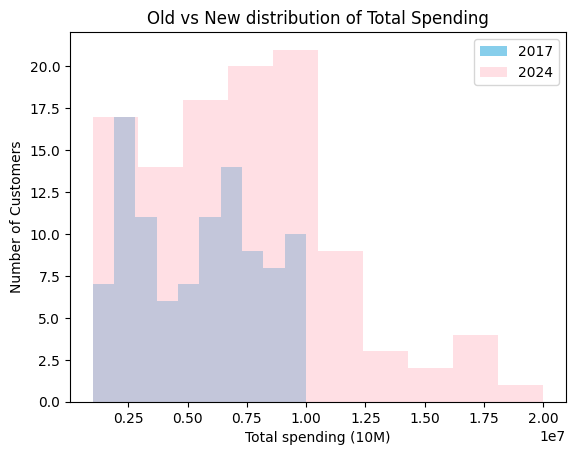

In [13]:
plt.hist(update['total_amount_old'], alpha = 1, color = 'skyblue', bins = 10, label = '2017')
plt.hist(update['total_amount_new'], alpha = 0.5, color = 'pink', bins = 10, label = '2024')

plt.title('Old vs New distribution of Total Spending')
plt.xlabel('Total spending (10M)')
plt.ylabel('Number of Customers')
plt.legend()

### New and Missing customers
New customers = customers in new but not in old dataset

Missing customers = customers in old but not in new dataset

In [14]:
new_cust = update.loc[~update['customer_id'].isin(old['customer_id']), ]
missing_cust = update.loc[update['last_purchase_date_new'].isnull(), ]

print(f'Total new customers (2018-2024): {new_cust.shape[0]}')
print(f'Total missing customers (2018-2024): {missing_cust.shape[0]}')

Total new customers (2018-2024): 20
Total missing customers (2018-2024): 11


### Churned criterion: No product purchase in the last 5 years

In [15]:
threshold_date = datetime.today() - relativedelta(years = 5)
churned_cust = update.loc[(update['last_purchase_date_new'] < threshold_date) & (update['last_purchase_date_old'] < threshold_date), ]
print(f'Total churned customers: {churned_cust.shape[0]}')
print(f'Churned rate: {round(churned_cust.shape[0]/update.shape[0]*100,2)}%')

Total churned customers: 64
Churned rate: 53.33%


### Changes in Loyalty program

In [16]:
joined_loyalty = update[(update['loyalty_program_old'] == 'no') & (update['loyalty_program_new'] == 'yes')]
left_loyalty = update[(update['loyalty_program_old'] == 'yes') & (update['loyalty_program_new'] == 'no')]

print(f'Customers who joined loyalty program after 2017: {joined_loyalty.shape[0]}')
print(f'Customers who left loyalty program after 2017: {left_loyalty.shape[0]}')

Customers who joined loyalty program after 2017: 14
Customers who left loyalty program after 2017: 16


In [17]:
loyalty_change = pd.crosstab(update['loyalty_program_old'], 
                             update['loyalty_program_new'], 
                             rownames=['Old Status'], 
                             colnames=['New Status'])
loyalty_change

New Status,no,yes
Old Status,,
no,56,14
yes,16,3


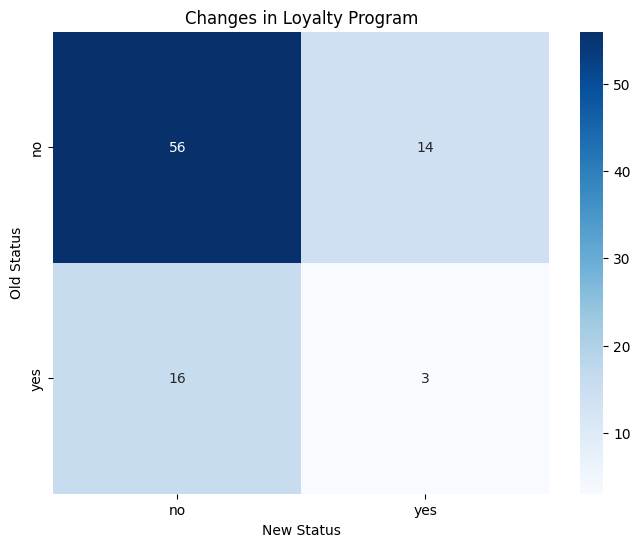

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(loyalty_change, annot=True, cmap='Blues')
plt.title('Changes in Loyalty Program')
plt.show()

### Relationship between Loyalty program and Total Spending/Number of Products Purchased

Text(0, 0.5, 'Products purchased')

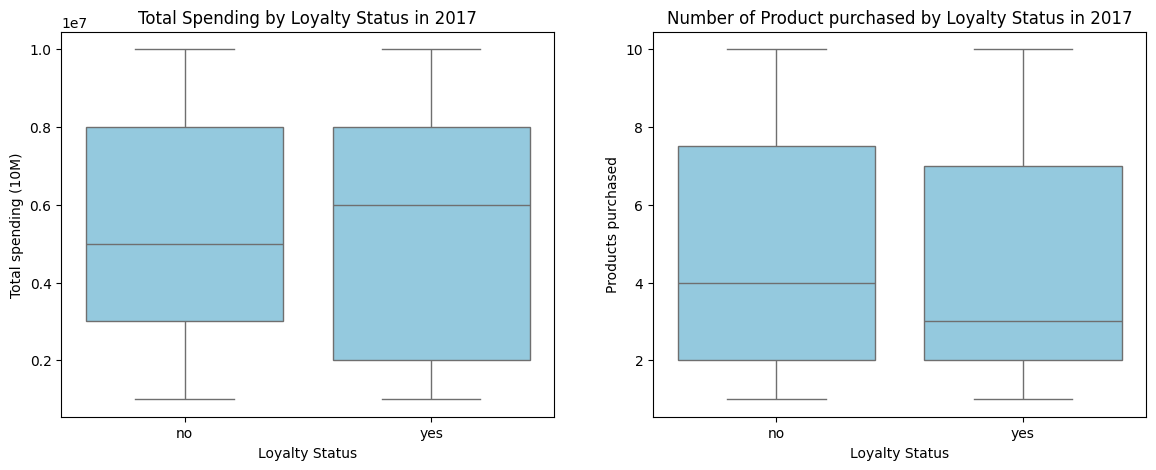

In [19]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x = update['loyalty_program_old'], y = update['total_amount_old'], color = 'skyblue')
plt.title('Total Spending by Loyalty Status in 2017')
plt.xlabel('Loyalty Status')
plt.ylabel('Total spending (10M)')

plt.subplot(1, 2, 2)
sns.boxplot(x = update['loyalty_program_old'], y = update['num_of_product_old'], color = 'skyblue')
plt.title('Number of Product purchased by Loyalty Status in 2017')
plt.xlabel('Loyalty Status')
plt.ylabel('Products purchased')

Text(0, 0.5, 'Products purchased')

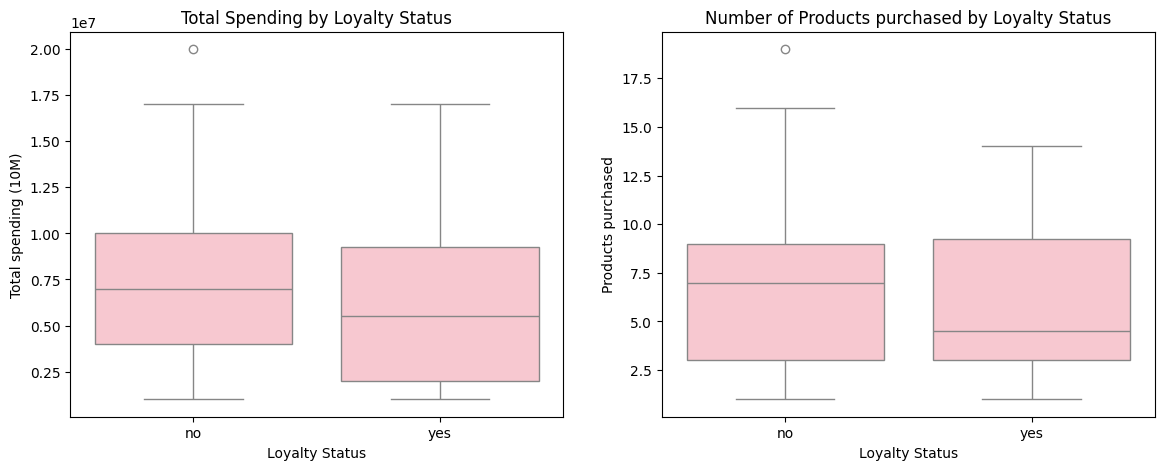

In [20]:
plt.figure(figsize = (14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x = update['loyalty_program_new'], y = update['total_amount_new'], color = 'pink')
plt.title('Total Spending by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Total spending (10M)')

plt.subplot(1, 2, 2)
sns.boxplot(x = update['loyalty_program_new'], y = update['num_of_product_new'], color = 'pink')
plt.title('Number of Products purchased by Loyalty Status')
plt.xlabel('Loyalty Status')
plt.ylabel('Products purchased')

Visually, there is no significant difference between total spending/number of product purchased of customers in and not in loyalty program (can use t-test to make sure)

### Phone number changed

In [21]:
phone_changed = update.loc[update['same_phone'] == 'no',]
print(f'Number of customers who changed their phone number: {phone_changed.shape[0]}')

Number of customers who changed their phone number: 57


### Age Distribution

In [22]:
labels = ['Young', 'Middle-aged', 'Senior', 'Elder']

In [23]:
update['age_in_2017'].describe()

count    120.000000
mean      41.375000
std        9.848485
min       25.000000
25%       32.000000
50%       43.000000
75%       50.000000
max       57.000000
Name: age_in_2017, dtype: float64

In [24]:
update['age_in_2024'].describe()

count    120.000000
mean      48.375000
std        9.848485
min       32.000000
25%       39.000000
50%       50.000000
75%       57.000000
max       64.000000
Name: age_in_2024, dtype: float64

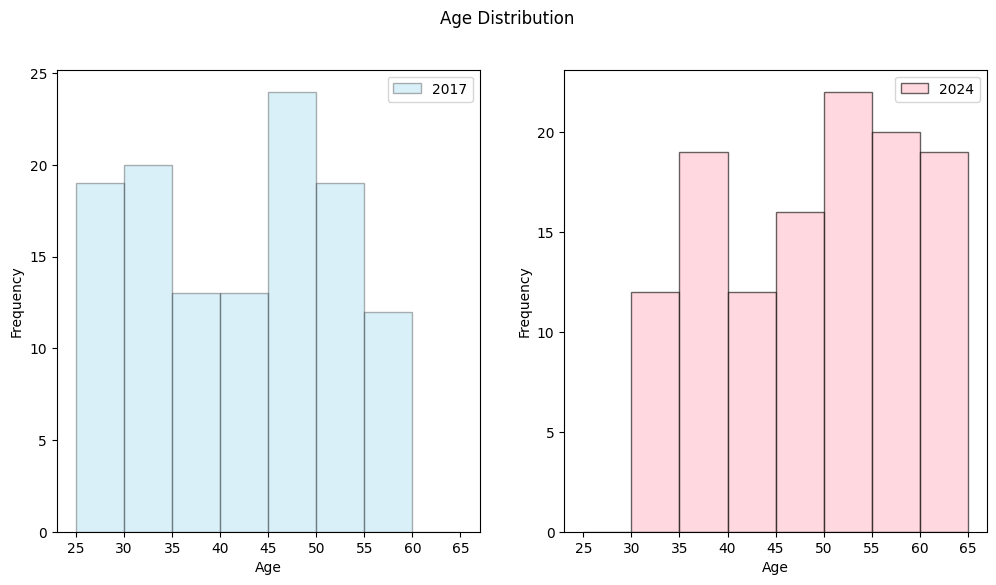

In [25]:
plt.figure(figsize = (12, 6))
plt.suptitle('Age Distribution')

plt.subplot(1, 2, 1)
plt.hist(update['age_in_2017'], 
         bins=[25, 30, 35, 40, 45, 50, 55, 60, 65], 
         color='skyblue', edgecolor='black', 
         alpha = 0.3, label = '2017')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(update['age_in_2024'], 
         bins=[25, 30, 35, 40, 45, 50, 55, 60, 65],
         color='pink', edgecolor='black', 
         alpha = 0.6, label = '2024')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

Customers are mostly in the age of 45-50 during 2024 and 50-55 during 2017

### Spending behavior of each age group

In [26]:
# Segment customers by age

update['age_segment'] = np.where(update['age_in_2024'].between(30, 39), '30-39',
                        np.where(update['age_in_2024'].between(40, 49), '40-49',
                        np.where(update['age_in_2024'].between(50, 65), '50-65', 'Other')))

In [27]:
update['age_segment'].value_counts()

age_segment
50-65    61
30-39    31
40-49    28
Name: count, dtype: int64

Text(0.5, 0, 'Age group')

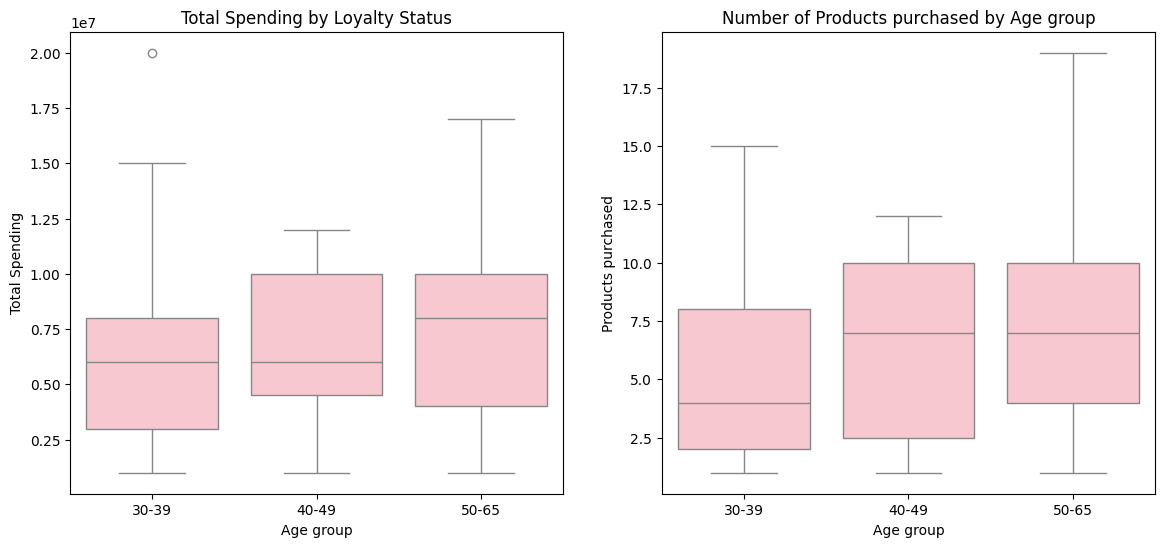

In [28]:
plt.figure(figsize = (14, 6))
order = ['30-39', '40-49', '50-65']

plt.subplot(1, 2, 1)
sns.boxplot(x = update['age_segment'], y = update['total_amount_new'], order = order, color = 'pink')
plt.title('Total Spending by Loyalty Status')
plt.ylabel('Total Spending')
plt.xlabel('Age group')

plt.subplot(1, 2, 2)
sns.boxplot(x = update['age_segment'], y = update['num_of_product_new'], order = order, color = 'pink')
plt.title('Number of Products purchased by Age group')
plt.ylabel('Products purchased')
plt.xlabel('Age group')

### Relationship between Number of Product purchased and Total spending

In [29]:
old_corr = update['num_of_product_old'].corr(update['total_amount_old'])
new_corr = update['num_of_product_new'].corr(update['total_amount_new'])

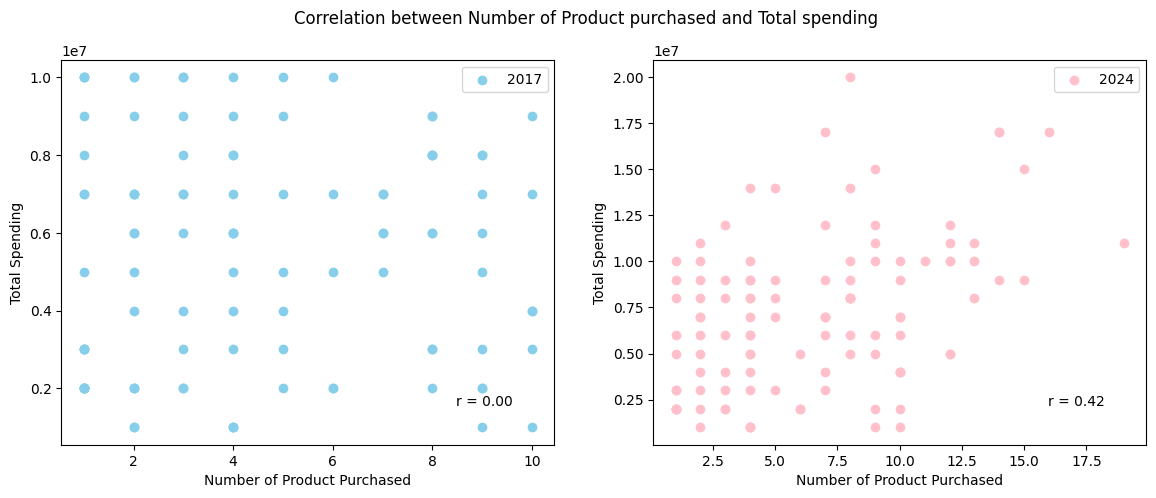

In [30]:
plt.figure(figsize = (14, 5))
plt.suptitle('Correlation between Number of Product purchased and Total spending')

plt.subplot(1, 2, 1)
plt.scatter(update['num_of_product_old'], update['total_amount_old'], color = 'skyblue', label = '2017')
plt.annotate(f'r = {old_corr:.2f}', xy=(0.8, 0.1), xycoords='axes fraction')
plt.xlabel('Number of Product Purchased')
plt.ylabel('Total Spending')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.scatter(update['num_of_product_new'], update['total_amount_new'], color = 'pink', label = '2024')
plt.annotate(f'r = {new_corr:.2f}', xy=(0.8, 0.1), xycoords='axes fraction')
plt.xlabel('Number of Product Purchased')
plt.ylabel('Total Spending')
plt.legend(loc = 'upper right')

From 2017 to 2024, correlation between number of product purchased and total spending has increased from 0 to 0.42 This may be due to several factors, for example, changes in customer behavior and changes in product pricing.